# FIR (Finite Impulse Response) Filters

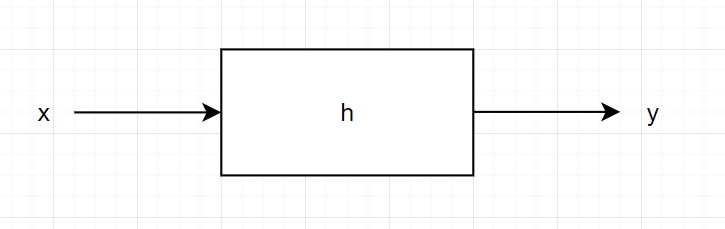

## Background reading
Proakis and Manolakis Section 10.2.1

## Convolution - Time Domain
$$
\begin{align}
y(n)& = h(0)x(n) + h(1)x(n-1) + \ldots + h(M-1)x(n-M+1) &\\
& = \sum_{k=0}^{M-1} h(k) x(n-k)&\\
\end{align}
$$

## DTFT - Frequency Domain
$$
  H(\omega) = \sum_{n=-\infty}^\infty h(n) e^{-j \omega n}
$$
$$
  Y(\omega) = H(\omega) X(\omega)
$$
Simple multiplication!

## Symmetry / Types of FIR filters
### Non-linear phase
No particular symmetry

### Linear phase type I - odd length, symmetric
$$
h(n) = h(M-n), 0 \le n \le M
$$
$M$ is odd.
### Linear phase type II - even length, symmetric
$$
h(n) = h(M-n), 0 \le n \le M
$$
$M$ is even.


### Linear phase type III  - even length, antisymmetric
$$
h(n) = -h(M-n), 0 \le n \le M
$$
$M$ is even.

### Linear phase type IV - odd length, antisymmetric
$$
h(n) = -h(M-n), 0 \le n \le M
$$
$M$ is odd.


## Exercise 1.
The DTFT at $\omega=0$, $H(0)$, is given by $\sum_{n=0}^{M-1} h(n)$.

The DTFT at $\omega=\pi$, $H(\pi)$, is given by $\sum_{n=0}^{M-1} h(n) (-1)^n$.

For each type of linear phase filter, answer the following:

a. If the DTFT $H(0)$ is 0, this is not a good LPF (low pass filter). Is this a good LPF?

b. If the DTFT $H(\pi)$ is 0, this is not a good HPF (high pass filter). Is this a good HPF?



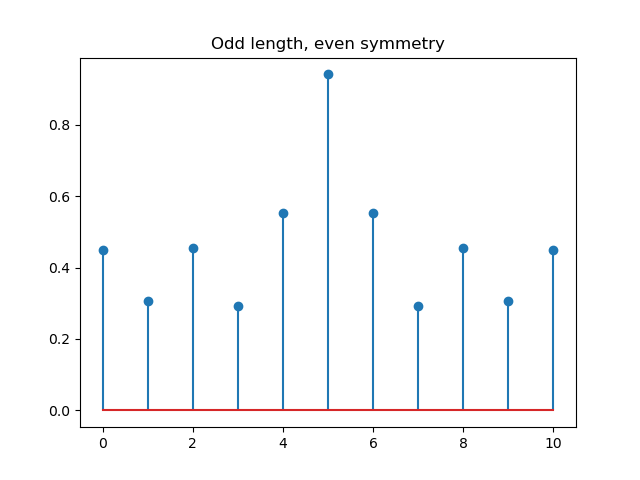

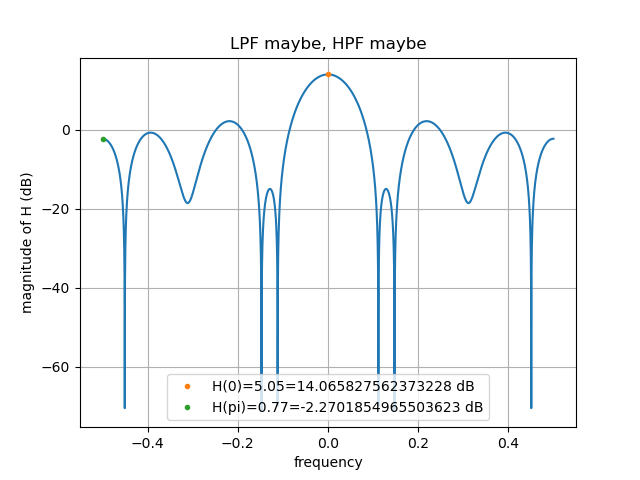

In [40]:

M = 11
import numpy as np
h = np.random.rand(M)  # create random filter
h[:M//2] = h[-M//2+1:][::-1]  # enforce symmetry

H0 = h.sum()
Hpi = h[::2].sum() - h[1::2].sum()

H0 = np.round(H0, decimals=2)
Hpi = np.round(Hpi, decimals=2)
figure()
stem(h)
title("Odd length, even symmetry")

figure()
nfft = 10000

f = (np.arange(nfft)/nfft - 0.5)
H = np.fft.fftshift(np.fft.fft(h, nfft))

plot(f, 20*np.log10(np.abs(H)))
plot(f[nfft//2], 20*np.log10(np.abs(H0)), '.', label=f'H(0)={H0}={20*np.log10(np.abs(H0))} dB')
plot(f[0], 20*np.log10(np.abs(Hpi)), '.', label=f'H(pi)={Hpi}={20*np.log10(np.abs(Hpi))} dB')
xlabel('frequency')
ylabel('magnitude of H (dB)')
title('LPF maybe, HPF maybe')
grid()
legend()

C:\Users\hp\AppData\Local\Temp\ipykernel_18912\2885167514.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure()
C:\Users\hp\AppData\Local\Temp\ipykernel_18912\2885167514.py:23: RuntimeWarning: divide by zero encountered in log10
  plot(f[0], 20*np.log10(np.abs(Hpi)), '.', label=f'H(pi)={Hpi}={20*np.log10(np.abs(Hpi))} dB')


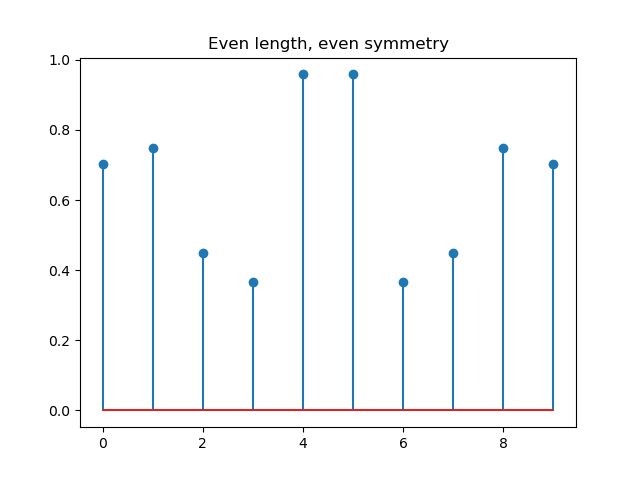

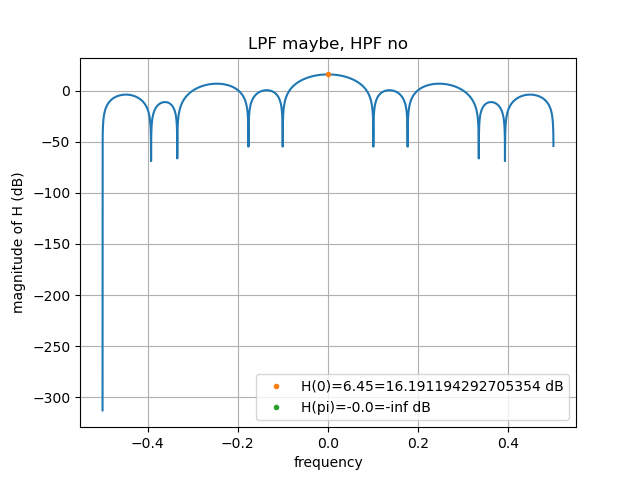

In [39]:

M = 10
import numpy as np
h = np.random.rand(M)  # create random filter
h[:M//2] = h[-M//2:][::-1]  # enforce symmetry

H0 = h.sum()
Hpi = h[::2].sum() - h[1::2].sum()

H0 = np.round(H0, decimals=2)
Hpi = np.round(Hpi, decimals=2)
figure()
stem(h)
title("Even length, even symmetry")

figure()
nfft = 10000

f = (np.arange(nfft)/nfft - 0.5)
H = np.fft.fftshift(np.fft.fft(h, nfft))

plot(f, 20*np.log10(np.abs(H)))
plot(f[nfft//2], 20*np.log10(np.abs(H0)), '.', label=f'H(0)={H0}={20*np.log10(np.abs(H0))} dB')
plot(f[0], 20*np.log10(np.abs(Hpi)), '.', label=f'H(pi)={Hpi}={20*np.log10(np.abs(Hpi))} dB')
xlabel('frequency')
ylabel('magnitude of H (dB)')
title('LPF maybe, HPF no')
grid()
legend()

C:\Users\hp\AppData\Local\Temp\ipykernel_18912\3315942985.py:21: RuntimeWarning: divide by zero encountered in log10
  plot(f, 20*np.log10(np.abs(H)))
C:\Users\hp\AppData\Local\Temp\ipykernel_18912\3315942985.py:22: RuntimeWarning: divide by zero encountered in log10
  plot(f[nfft//2], 20*np.log10(np.abs(H0)), '.', label=f'H(0)={H0}={20*np.log10(np.abs(H0))} dB')


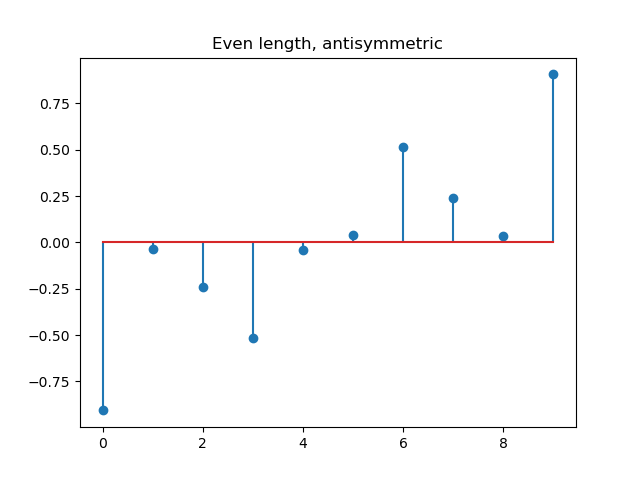

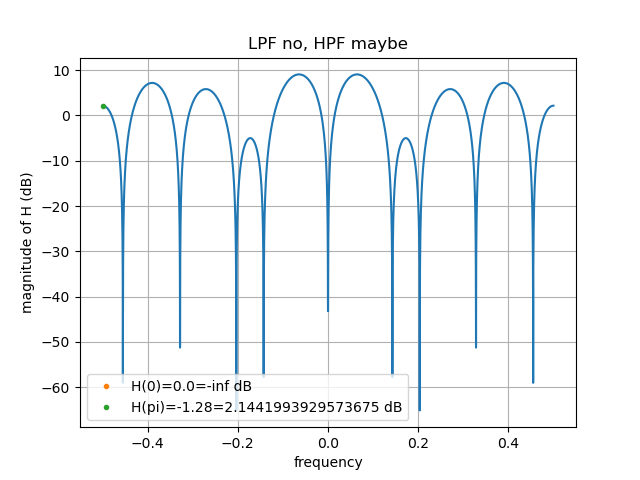

In [43]:

M = 10
import numpy as np
h = np.random.rand(M)  # create random filter
h[:M//2] = -h[-M//2:][::-1]  # enforce symmetry

H0 = h.sum()
Hpi = h[::2].sum() - h[1::2].sum()

H0 = np.round(H0, decimals=2)
Hpi = np.round(Hpi, decimals=2)
figure()
stem(h)
title("Even length, antisymmetric")

figure()
nfft = 10000

f = (np.arange(nfft)/nfft - 0.5)
H = np.fft.fftshift(np.fft.fft(h, nfft))

plot(f, 20*np.log10(np.abs(H)))
plot(f[nfft//2], 20*np.log10(np.abs(H0)), '.', label=f'H(0)={H0}={20*np.log10(np.abs(H0))} dB')
plot(f[0], 20*np.log10(np.abs(Hpi)), '.', label=f'H(pi)={Hpi}={20*np.log10(np.abs(Hpi))} dB')
xlabel('frequency')
ylabel('magnitude of H (dB)')
title('LPF no, HPF maybe')
grid()
legend()

C:\Users\hp\AppData\Local\Temp\ipykernel_18912\1035528316.py:22: RuntimeWarning: divide by zero encountered in log10
  plot(f, 20*np.log10(np.abs(H)))
C:\Users\hp\AppData\Local\Temp\ipykernel_18912\1035528316.py:23: RuntimeWarning: divide by zero encountered in log10
  plot(f[nfft//2], 20*np.log10(np.abs(H0)), '.', label=f'H(0)={H0}={20*np.log10(np.abs(H0))} dB')
C:\Users\hp\AppData\Local\Temp\ipykernel_18912\1035528316.py:24: RuntimeWarning: divide by zero encountered in log10
  plot(f[0], 20*np.log10(np.abs(Hpi)), '.', label=f'H(pi)={Hpi}={20*np.log10(np.abs(Hpi))} dB')


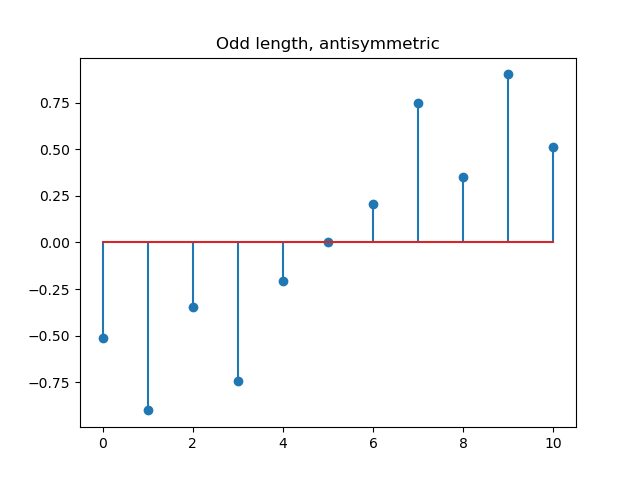

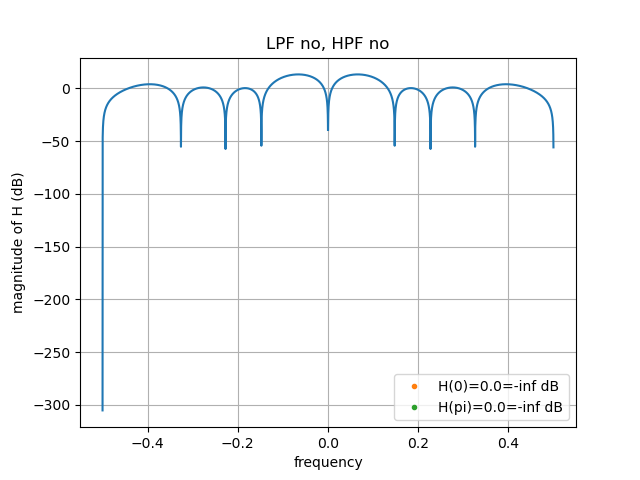

In [47]:

M = 11
import numpy as np
h = np.random.rand(M)  # create random filter
h[:M//2] = -h[-M//2+1:][::-1]  # enforce symmetry
h[M//2] = 0  # center tap must be 0

H0 = h.sum()
Hpi = h[::2].sum() - h[1::2].sum()

H0 = np.round(H0, decimals=2)
Hpi = np.round(Hpi, decimals=2)
figure()
stem(h)
title("Odd length, antisymmetric")

figure()
nfft = 10000

f = (np.arange(nfft)/nfft - 0.5)
H = np.fft.fftshift(np.fft.fft(h, nfft))

plot(f, 20*np.log10(np.abs(H)))
plot(f[nfft//2], 20*np.log10(np.abs(H0)), '.', label=f'H(0)={H0}={20*np.log10(np.abs(H0))} dB')
plot(f[0], 20*np.log10(np.abs(Hpi)), '.', label=f'H(pi)={Hpi}={20*np.log10(np.abs(Hpi))} dB')
xlabel('frequency')
ylabel('magnitude of H (dB)')
title('LPF no, HPF no')
grid()
legend()

In [13]:
h

array([-1.54312898,  1.56470449, -0.44010358,  1.42110745, -0.80536753,
        0.        , -0.80536753,  1.42110745, -0.44010358,  1.56470449,
       -1.54312898])

## Exercise 2.
For each of the following filters, determine its symmetry type (non-linear phase, linear phase type I, linear phase type II, linear phase type III, or linear phase type IV)

1,-1,2,1,-1  Non-linear, center tap must be 0 for anti-symmetric (will accept type IV as I didn't teach this)

1,-1,0,1,-1  Type IV  Odd length, anti-symmetric

1,2,2,1      Type II  Even length, symmetric

1,2,3,2,1    Type I   Odd length, symmetric

1,2,3        Non-linear   Odd length, no symmetry

-1,1,-1,1    Type III   Even length, anti-symmetric



## Exercise 3.
A moving average filter is an FIR filter of length N with coefficients of 1/N.
This is a simple LPF (Low Pass Filter).

a. What is the DTFT of the filter? I'm not asking for the formula - rather, use "np.fft.fft" to compute the DTFT on an evenly spaced array of frequencies. Plot the DTFT magnitude in dB $H(\omega)$ for N=10 (use $20\log_{10}(|H(\omega)|)$ to convert to dB)

b. Using numpy, determine the frequency $\omega$ at which the absolute value of $H(\omega)$ crosses -3 dB 

c. Determine the frequency $\omega$ closest to 0 at which $H(\omega)$ is 0

d. Determine the first side-lobe height of $H(\omega)$ in dB. The "main lobe" is the peak at $\omega=0$. The "side lobes" are the peaks at lower values (negative dB) at higher frequencies. The first side lobe is the first peak after the initial zero crossing (of part c).

e. Plot b., c., and d. as a function of $N$, for $N$ from 5 to 200.



In [25]:
%matplotlib widget

In [26]:
from matplotlib.pyplot import *

In [27]:
from scipy.signal import upfirdn

Text(0.5, 0, 'sample index')

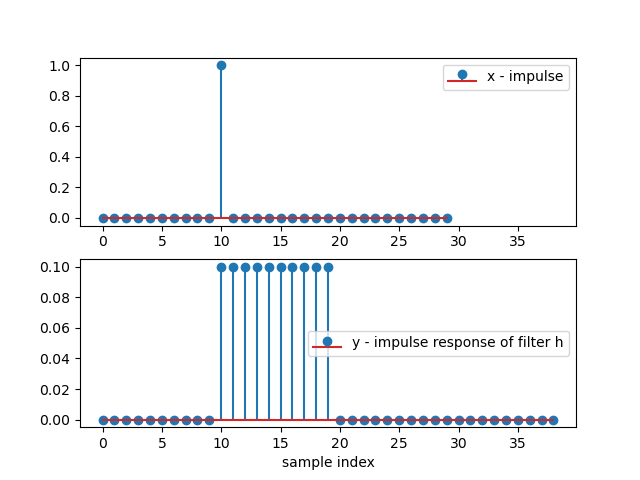

In [97]:
N = 10
h = np.ones((N,))/N  # moving average FIR filter

#Define "x" to be an "impulse", also known as kronecker delta function -
#  just a one at a single sample value
x = np.zeros((30,)) 
x[10] = 1

y = upfirdn(h, x)

figure()
subplot(2,1,1)
stem(x, label='x - impulse')
ax1 = gca()
legend()
subplot(2,1,2)
stem(y, label='y - impulse response of filter h')
xlim = getp(gca(), 'xlim')
setp(ax1, xlim=xlim)
legend()
xlabel('sample index')

In [49]:
upfirdn?

In [50]:
# CONVINCE OURSELVES THAT UPFIRDN IS DOING CONVOLUTION

y_length = len(x) + len(h) - 1
y1 = np.zeros((y_length,))   # a new signal that should be the same as "y"

for n in range(y_length):
    for k in range(len(h)):
        if n-k < len(x)-1:  # avoid indexing beyond the end of "x"
            y1[n] += h[k]*x[n-k]

np.sum(abs(y-y1))  # if 0, these are the same!

0.0

In [51]:
y-y1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

C:\Users\hp\AppData\Local\Temp\ipykernel_18912\788926581.py:7: RuntimeWarning: divide by zero encountered in log10
  plot(f, 20*np.log10(np.abs(H)))


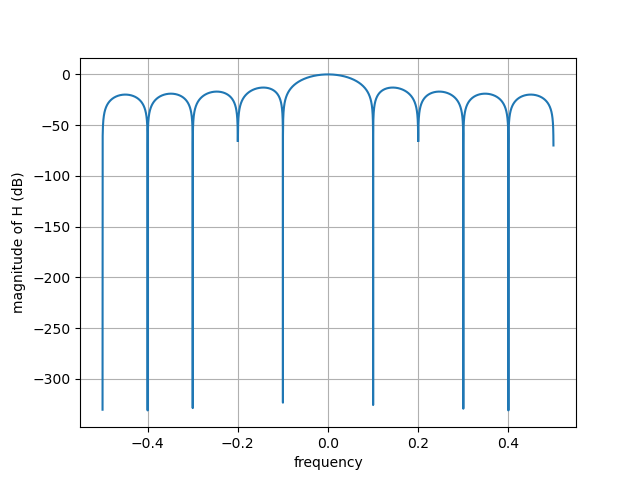

In [98]:
nfft = 10000

f = (np.arange(nfft)/nfft - 0.5)
H = np.fft.fftshift(np.fft.fft(h, nfft))

figure()
plot(f, 20*np.log10(np.abs(H)))
xlabel('frequency')
ylabel('magnitude of H (dB)')
grid()

In [53]:
y, y1

(array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.1, 0.1,
        0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]),
 array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.1, 0.1,
        0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]))

C:\Users\hp\AppData\Local\Temp\ipykernel_18912\1746484759.py:5: RuntimeWarning: divide by zero encountered in log10
  plot(f, 20*np.log10(np.abs(H)))


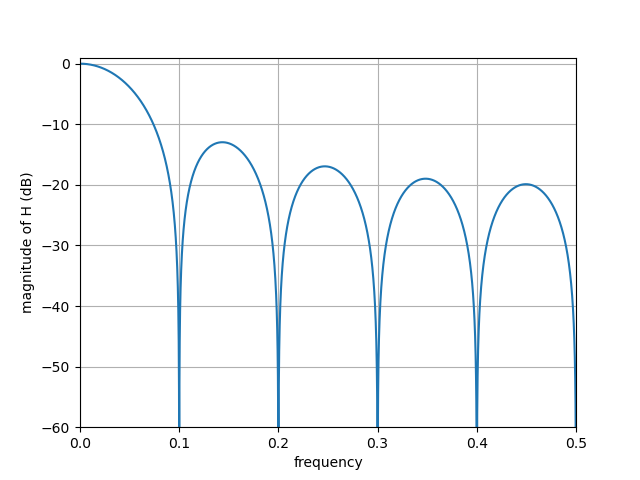

In [54]:
# Plot again but set ylimits to something reasonable, and xlimits to positive only 
# because the response is symmetric

figure()
plot(f, 20*np.log10(np.abs(H)))
xlabel('frequency')
ylabel('magnitude of H (dB)')
setp(gca(), xlim=(0, 0.5), ylim=(-60,1))
grid()

In [101]:
# Find frequency where H[f[i]] is closest to -3
i = 0
Hdb = 20*np.log10(np.abs(H))
f_min = 0
H_min = 1000
while i < len(Hdb):
    if abs(Hdb[i] + 3) < H_min:
        H_min = abs(Hdb[i] + 3)
        f_min = f[i]
    i += 1
print(f'Exercise 3.b. 3 dB crossing = {f_min} radians')


Exercise 3.b. 3 dB crossing = 0.044399999999999995 radians


C:\Users\hp\AppData\Local\Temp\ipykernel_18912\2408607422.py:3: RuntimeWarning: divide by zero encountered in log10
  Hdb = 20*np.log10(np.abs(H))


In [102]:
# Find first frequency > 0 where H[f[i]] 0
i = nfft//2
Hdb = 20*np.log10(np.abs(H))
f_min = 0
H_min = 1000
while i < len(Hdb):
    if Hdb[i] < H_min:
        H_min = Hdb[i]
        f_min = f[i]
    elif H_min < Hdb[i]:
        break
    i += 1
    
print(f'Exercise 3.c. 1st zero crossing = {f_min} radians')


Exercise 3.c. 1st zero crossing = 0.09999999999999998 radians


C:\Users\hp\AppData\Local\Temp\ipykernel_18912\1234737696.py:3: RuntimeWarning: divide by zero encountered in log10
  Hdb = 20*np.log10(np.abs(H))


In [100]:
# Find height of first sidelobe
i = nfft//2 + 1
Hdb = 20*np.log10(np.abs(H))
f_min = 0
H_min = 1000
while i < len(Hdb):
    if (Hdb[i]>Hdb[i-1]) & (Hdb[i]>Hdb[i+1]):  # local peak
        H_min = Hdb[i]
        f_min = f[i]
        break
    i += 1
print(f'Exercise 3.d. First sidelobe height = {H_min} dB')

Exercise 3.d. First sidelobe height = -12.966169517860987 dB


C:\Users\hp\AppData\Local\Temp\ipykernel_18912\440191204.py:3: RuntimeWarning: divide by zero encountered in log10
  Hdb = 20*np.log10(np.abs(H))


In [93]:
# make functions

def f3db(H):
    # Find frequency where H[f[i]] is closest to -3
    i = 0
    Hdb = 20*np.log10(np.abs(H))
    f_min = 0
    H_min = 1000
    while i < len(Hdb):
        if abs(Hdb[i] + 3) < H_min:
            H_min = abs(Hdb[i] + 3)
            f_min = f[i]
        i += 1
    return abs(f_min)

def fnull(H):
    # Find first frequency > 0 where H[f[i]] 0
    i = nfft//2
    Hdb = 20*np.log10(np.abs(H))
    f_min = 0
    H_min = 1000
    while i < len(Hdb):
        if Hdb[i] < H_min:
            H_min = Hdb[i]
            f_min = f[i]
        elif H_min < Hdb[i]:
            break
        i += 1
    return abs(f_min)

def sidelobe(H):
    # Find height of first sidelobe
    i = nfft//2 + 1
    Hdb = 20*np.log10(np.abs(H))
    f_min = 0
    H_min = 1000
    while i < len(Hdb):
        if (Hdb[i]>Hdb[i-1]) & (Hdb[i]>Hdb[i+1]):  # local peak
            H_min = Hdb[i]
            f_min = f[i]
            break
        i += 1
    return H_min


In [104]:
# Loop over N and store in vectors (lists)

Nvec = range(5, 201)
f3db_vec = []
fnull_vec = []
sidelobe_vec = []
for N in Nvec:
    h = np.ones((N,))/N  # moving average FIR filter
    nfft = 10000
    f = (np.arange(nfft)/nfft - 0.5)
    H = np.fft.fftshift(np.fft.fft(h, nfft))
    f3db_vec.append(f3db(H))
    fnull_vec.append(fnull(H))
    sidelobe_vec.append(sidelobe(H))

C:\Users\hp\AppData\Local\Temp\ipykernel_18912\1897191965.py:6: RuntimeWarning: divide by zero encountered in log10
  Hdb = 20*np.log10(np.abs(H))
C:\Users\hp\AppData\Local\Temp\ipykernel_18912\1897191965.py:19: RuntimeWarning: divide by zero encountered in log10
  Hdb = 20*np.log10(np.abs(H))
C:\Users\hp\AppData\Local\Temp\ipykernel_18912\1897191965.py:34: RuntimeWarning: divide by zero encountered in log10
  Hdb = 20*np.log10(np.abs(H))


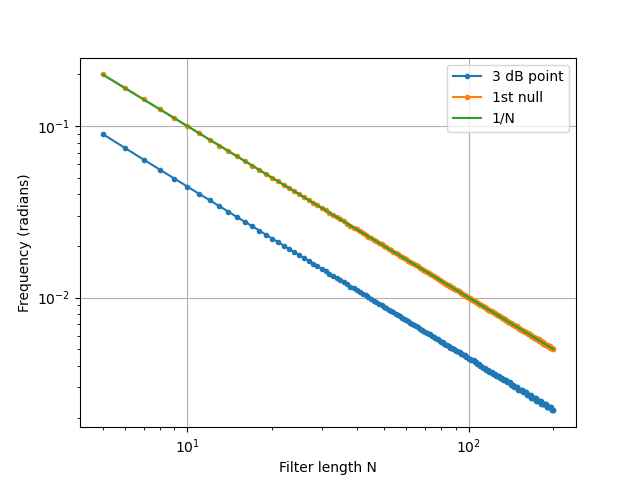

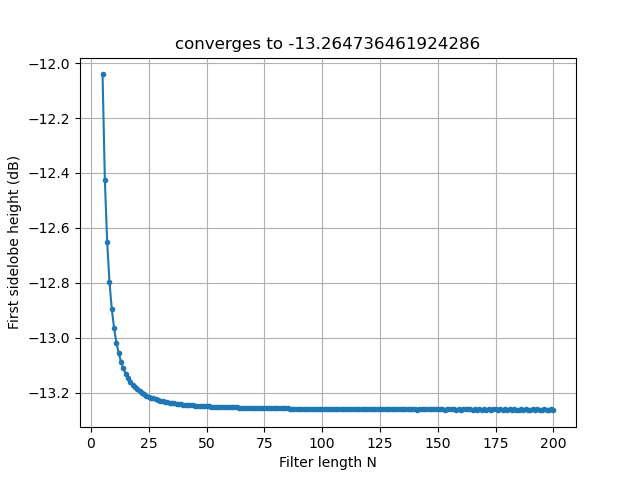

In [105]:
# For the first 2, I like the loglog plot as it makes a straight line.
# Turns out, the 1st null is at 1/N
figure()
loglog(Nvec, f3db_vec, '.-', label='3 dB point')
plot(Nvec, fnull_vec, '.-', label='1st null')
plot(Nvec, 1/np.array(Nvec), label='1/N')
legend()
grid()
xlabel('Filter length N')
ylabel('Frequency (radians)')

figure()
plot(Nvec, sidelobe_vec, '.-')
xlabel('Filter length N')
ylabel('First sidelobe height (dB)')
title(f'converges to {sidelobe_vec[-1]}')
grid()

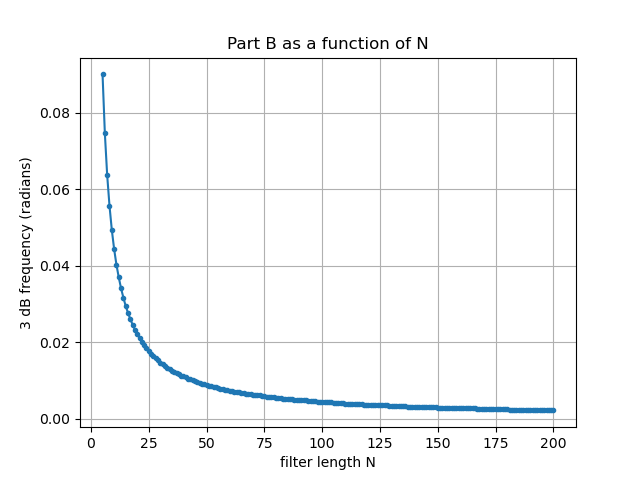

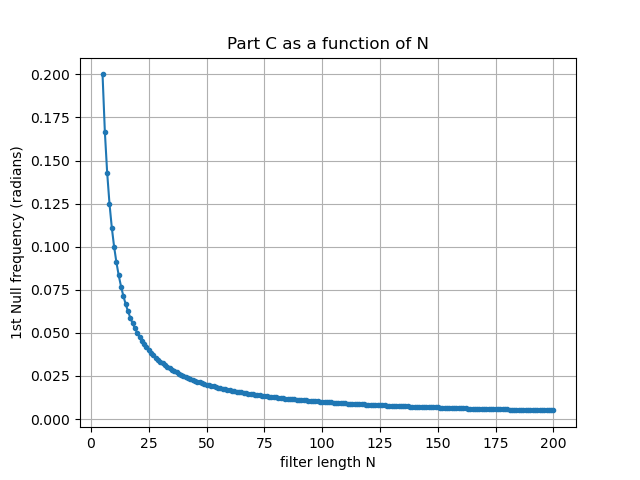

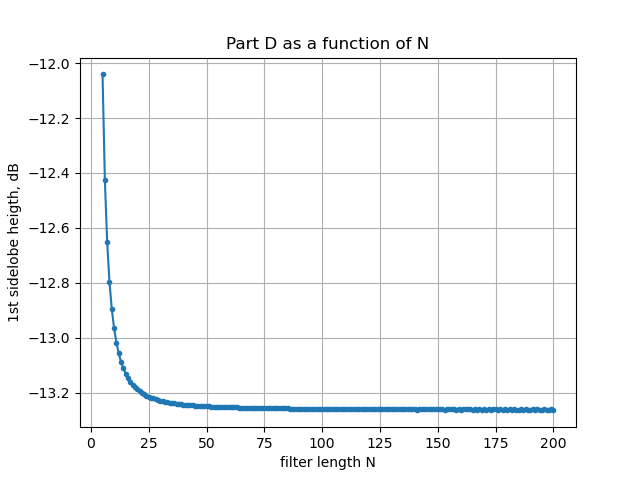

In [106]:
figure()
plot(Nvec, f3db_vec, '.-')
xlabel('filter length N')
ylabel('3 dB frequency (radians)')
title('Part B as a function of N')
grid()

figure()
plot(Nvec, fnull_vec, '.-')
xlabel('filter length N')
ylabel('1st Null frequency (radians)')
title('Part C as a function of N')
grid()

figure()
plot(Nvec, sidelobe_vec, '.-')
xlabel('filter length N')
ylabel('1st sidelobe heigth, dB')
title('Part D as a function of N')
grid()


